In [6]:
import os
import pandas as pd
from datetime import date
start_day = date.today()
end_date = start_day
print(end_date)
search_term = '#bankofamerica'
from_date = '2021-12-01'
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
          counter = 0
else: 
          df = pd.read_csv('result-tweets.txt', names=['link'])
          counter = df.size
          
print('Number of Tweets : ' + str(counter))


2022-04-16
Number of Tweets : 2629


In [7]:
max_results = 5000
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
    print("No tweets found")
else: 
    df = pd.read_csv('extracted-tweets.txt', names=['content'])
    for row in df['content'].iteritems():
        print(row)

(0, "'Mark Baum was right in 2008 and the market is about to collapse again. #MarketCrash #Fraud #Corrupt #Jpmorgan #BankofAmerica'")
(1, "'@Ryan06974467 My guess")
(2, "'@jenya_panov Не")
(3, "'Did you know that Farquaad is trained in ballet")
(4, "'Bank of America https://t.co/lC8AxPALRz #BankofAmerica'")
(5, "$BAC's Aroon indicator drops into Downtrend on March 17, 2022. View odds for this and other indicators: https://t.co/4zB44rdyc3 #BankofAmerica #stockmarket #stock https://t.co/hhVwcWgwsJ")
(6, "'#BankOfAmerica çok bastırıyor aşağıı vermek için\\n2")
(7, "'$BAC enters bearish trend #BankofAmerica #stockmarket #stock https://t.co/2kd0W0Z65J'")
(8, "'#bankofamerica için neler de denmiş..acaba https://t.co/Aa8inD9LFj'")
(9, '\'Who\\\'s ready to wave their freak flags high?! Get your tickets to "Shrek the Musical" today by visiting https://t.co/W1JSG5bmRu.\\n\\n#ShrektheMusical #Shrek #ChildrensTheatre #BankofAmerica #InfusionFund https://t.co/LLCUGDOY6e\'')
(10, "'BOA doesn’t allow

(2405, '\'Set sail on the classic adventure with "The Velveteen Rabbit." You don\\\'t need a telescope to see this performance at the McColl Family Theatre. Every seat is a good seat! Get tix: https://t.co/zmMe7awPGJ\\n\\n#BankofAmerica #InfusionFund #Pirates #ChildrensTheatre #ChildrensBooks https://t.co/cJchxT4bZt\'')
(2406, "'New Impact For Responsible Investing https://t.co/2F4CANeBit #arbitrage #assetmanagement #bankofamerica #blackrock #bridgewaterassociates #carlylegroup #esg #kkr'")
(2407, "'Wall Street Week - Full Show (12/10/2021) - https://t.co/ajtHmcnbIN - #America #Bank #BankOfAmerica #Finance #Inflation #Investors #Markets #Omicron #Rock #Treasury #WallStreet'")
(2408, "'Thinking of opening up a class action lawsuit against @usbank does anyone have any experience with them being unethical")
(2409, "'$BAC in Downtrend: Stochastic indicator sits in oversold zone for 8 days. View odds for this and other indicators: https://t.co/2BRkoummda #BankofAmerica #stockmarket #stock h

In [8]:
df.head()

,content
0,'Mark Baum was right in 2008 and the market is...
1,'@Ryan06974467 My guess
2,'@jenya_panov Не
3,'Did you know that Farquaad is trained in ballet
4,'Bank of America https://t.co/lC8AxPALRz #Bank...


In [10]:
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')
df['stopwords'] = df['content'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df[['content','stopwords']].head()

[nltk_data] Downloading package stopwords to /Users/gaode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gaode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gaode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gaode/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,content,stopwords
0,'Mark Baum was right in 2008 and the market is...,7
1,'@Ryan06974467 My guess,0
2,'@jenya_panov Не,0
3,'Did you know that Farquaad is trained in ballet,4
4,'Bank of America https://t.co/lC8AxPALRz #Bank...,1


In [11]:
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    'mark baum was right in 2008 and the market is...
1                              '@ryan06974467 my guess
2                                     '@jenya_panov не
3     'did you know that farquaad is trained in ballet
4    'bank of america https://t.co/lc8axpalrz #bank...
Name: content, dtype: object

In [12]:
df['content'] = df['content'].str.replace('[^\w\s]','')
df['content'].head()

/var/folders/1f/snwvkg952g599fptk4bdqm3r0000gn/T/ipykernel_90745/3987221637.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')


0    mark baum was right in 2008 and the market is ...
1                                ryan06974467 my guess
2                                       jenya_panov не
3      did you know that farquaad is trained in ballet
4     bank of america httpstcolc8axpalrz bankofamerica
Name: content, dtype: object

In [13]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].sample(10)

159     iron mike tyson amp bank america boa back sola...
2401    bac downtrend stochastic indicator sitting ove...
1860    bank america lucra mais que esperado 4º trimes...
2196    blessing work company offers incredible parent...
4           bank america httpstcolc8axpalrz bankofamerica
1669    cbdc bankofamerica stablecoin adoption news ht...
959     little training receive bankofamerica cant ide...
1070    customer service country completely dead first...
619     bankofamerica hey bankofamerica conduct proper...
2143    bank america increase bonus pool employees ban...
Name: content, dtype: object

In [14]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
import re
import string

df['content'] = df['content'].apply(lambda x: remove_url(x))

In [15]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['content'] = df['content'].apply(lambda x: remove_html(x))

In [16]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
# remove all emojis from df
df['content'] = df['content'].apply(lambda x: remove_emoji(x))



In [17]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)
df['content'] = df.content.apply(round1)


In [18]:
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)
df['content'] = df.content.apply(round2)
df.content

0       mark baum right  market collapse marketcrash f...
1                                                   guess
2                                           jenyapanov не
3                            know farquaad trained ballet
4                             bank america  bankofamerica
                              ...                        
2607                       aidvisor made bearish call bac
2608    look iota patents like boa bankofamerica gemin...
2609    usbank guys eye catching logo guys banking fes...
2610    boa gotten  awkward situations men amp love nn...
2611     hertz thanks  gets worse hertz lied bankofame...
Name: content, Length: 2612, dtype: object

In [20]:
w = wordcloud.WordCloud(background_color="white")  

def newsfunction(a):
    res = str()
    for i in a:
        res +=','
        res += i
    return ''.join(res)

freq = pd.Series(' '.join(df['content']).split()).value_counts()[:50]
new_data = pd.DataFrame(freq)
new_data['keywords'] = freq.index
abc = newsfunction(new_data['keywords'])
w.generate(abc)
w.to_file("pywordcloud2.png")

In [56]:
# df['content'].head(20)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
STOPWORDS = stopwords.words('english')
vect = TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text = vect.fit_transform(df['content'])

<2612x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 17630 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=30,
learning_method='online',random_state=100,max_iter=20) 
lda_top=lda_model.fit_transform(vect_text)

In [39]:
len(lda_top)
lda_top[3]

array([0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.51666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667,
       0.01666667, 0.01666667, 0.01666667, 0.01666667, 0.01666667])

In [49]:
def maxi(x):
    maximum = x[0]
    for i in range (0,len(x)):
        if x[i] >= maximum:
            maximum = x[i]
            index=i
    return index


In [50]:
for i,topic in enumerate(lda_top):
    print("Tweet ",i,": ",topic*100,"%")

Tweet  0 :  [ 1.00662804  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804
  1.00662804  1.00662804  1.00662804  1.00662804 70.80778688  1.00662804
  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804
  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804
  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804  1.00662804] %
Tweet  1 :  [ 1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667 51.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667] %
Tweet  2 :  [3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33

  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667] %
Tweet  336 :  [3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333
 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333 3.33333333] %
Tweet  337 :  [ 1.30511877  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877
  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877
  1.30511877 20.16746982 43.28920466  1.30511877  1.30511877  1.30511877
  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877
  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877  1.30511877] %
Tweet  338 :  [ 0.82017747  0.82017747  0.82017747  0.82017747  0.82017747  9.92860635
  0.82017747  0.82017747  0.82017747  0.82017747 11.10864818  0.82017747
 56.81795385  0.82017747  0.82

  1.07488472  1.07488472  1.07488472  1.07488472  1.07488472  1.07488472] %
Tweet  676 :  [ 0.77653808  0.77653808  0.77653808  0.77653808  0.77653808  0.77653808
  0.77653808  0.77653808  0.77653808  0.77653809  0.77653808  0.77653808
 56.06816562  0.77653808 22.18876804  0.77653808  0.77653808  0.77653808
  0.77653808  0.77653808  0.77653808  0.77653808  0.77653808  0.77653808
  0.77653808  0.77653808  0.77653808  0.77653808  0.77653808  0.77653808] %
Tweet  677 :  [ 1.51620417  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417
  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417
  1.51620417  1.51620417 56.03007916  1.51620417  1.51620417  1.51620417
  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417
  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417  1.51620417] %
Tweet  678 :  [ 0.81756392  0.81756392  0.81756392  0.81756392  0.81756392  0.81756392
  7.96773077  0.81756392  0.81756392 69.1404796   0.81756392  0.81756392


  1.52757359  1.52757359  1.52757359  1.52757359  1.52757359  1.52757359] %
Tweet  980 :  [ 1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667 51.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667] %
Tweet  981 :  [ 0.77888944  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944
  0.77888944  0.77888944  0.77888944 77.41220636  0.77888944  0.77888944
  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944
  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944
  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944  0.77888944] %
Tweet  982 :  [ 1.66666667  1.66666667  1.66666667  1.66666667  1.66666667  1.66666667
  1.66666667  1.66666667  1.66666667 51.66666667  1.66666667  1.66666667


  0.88852222  0.88852222  0.88852222  0.88852222  0.88852222  0.88852222] %
Tweet  1358 :  [ 1.24257725  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725
  1.24257725  1.24257725  1.24257725 63.96525985  1.24257725  1.24257725
  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725
  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725
  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725] %
Tweet  1359 :  [ 0.74044026  0.74044026  0.74044026  0.74044026  0.74044026  0.74044026
  0.74044026  0.74044026  0.74044026  0.74044026  0.74044026  0.74044026
 46.6657967   0.74044026 25.52591952  0.74044026  0.74044026  0.74044026
  0.74044026  0.74044026  0.74044026  0.74044026  0.74044026  0.74044026
  7.81639662  0.74044026  0.74044026  0.74044026  0.74044026  0.74044026] %
Tweet  1360 :  [ 1.24257725  1.24257725  1.24257725  1.24257725  1.24257725  1.24257725
  1.24257725  1.24257725  1.24257725 63.96525985  1.24257725  1.242577

Tweet  1679 :  [ 1.07333942  1.07333942  1.07333942  1.07333942  1.07333942  1.07333942
  1.07333942  1.07333942  1.07333942 18.06895517  1.07333942  1.07333942
 51.87754105  1.07333942  1.07333942  1.07333942  1.07333942  1.07333942
  1.07333942  1.07333942  1.07333942  1.07333942  1.07333942  1.07333942
  1.07333942  1.07333942  1.07333942  1.07333942  1.07333942  1.07333942] %
Tweet  1680 :  [ 1.38194566  1.38194566  1.38194566  1.38194566  1.38194566  1.38194566
  1.38194566  1.38194566  1.38194566 29.0348619   1.38194566  1.38194566
 32.27065962  1.38194566  1.38194566  1.38194566  1.38194566  1.38194566
  1.38194566  1.38194566  1.38194566  1.38194566  1.38194566  1.38194566
  1.38194566  1.38194566  1.38194566  1.38194566  1.38194566  1.38194566] %
Tweet  1681 :  [ 1.12401263  1.12401263 29.48470109  1.12401263  1.12401263  1.12401263
  1.12401263  1.12401263  1.12401263  1.12401263  1.12401263  1.12401263
 39.04294516  1.12401263  1.12401263  1.12401263  1.12401263  1.12401263


  0.78068875  0.78068875  6.57158118 25.70496935  0.78068875  0.78068875] %
Tweet  1990 :  [ 0.98388473  0.98388473  0.98388473  0.98388473  0.98388473  0.98388473
  0.98388473  0.98388473  0.98388473  0.98388473 17.85157098  0.98388473
 54.5996567   0.98388473  0.98388473  0.98388473  0.98388473  0.98388473
  0.98388473  0.98388473  0.98388473  0.98388473  0.98388473  0.98388473
  0.98388473  0.98388473  0.98388473  0.98388473  0.98388473  0.98388473] %
Tweet  1991 :  [ 0.71977354  0.71977354  0.71977354  0.71977354  0.71977354  0.71977354
  0.71977354  0.71977354  0.71977354  0.71977354  0.71977354  0.71977354
  0.71977354  0.71977354  0.71977354  0.71977354  0.71977354  0.71977354
  0.71977354  0.71977354 66.54624917  0.71977354  0.71977354  0.71977354
  0.71977354  0.71977354  0.71977354 13.30009172  0.71977354  0.71977354] %
Tweet  1992 :  [ 0.89515481  0.89515481  0.89515481  0.89515481  0.89515481  0.89515481
  0.89515481  0.89515481  0.89515481  0.89515481  0.89515481  0.895154

  1.03249702  1.03249702  1.03249702  1.03249702  1.03249702  1.03249702] %
Tweet  2343 :  [ 0.78679268  0.78679268  0.78679268  0.78679268  0.78679268  0.78679268
  0.78679268  0.78679268  0.78679268  0.78679268 36.75830157  0.78679268
  0.78679268  0.78679268 25.76473658  0.78679268 16.23355957  0.78679268
  0.78679268  0.78679268  0.78679268  0.78679268  0.78679268  0.78679268
  0.78679268  0.78679268  0.78679268  0.78679268  0.78679268  0.78679268] %
Tweet  2344 :  [ 1.38137498  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498
  1.38137498  1.38137498  1.38137498 59.94012553  1.38137498  1.38137498
  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498
  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498
  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498  1.38137498] %
Tweet  2345 :  [ 1.04250855  1.04250855  1.04250855  1.04250855  1.04250855  1.04250855
  1.04250855  1.04250855  1.04250855  1.04250855  1.04250855  1.042508

In [51]:
#find top 10 words in each topic
vocab = vect.get_feature_names()
topics=[]
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     c, v =  zip(*sorted_words)
     topics.append(c)
     print(" ")
     print("Topic "+str(i)+": ")
     for t in sorted_words:
#             topics[i].append(t[0])
            print(t[0],end=" ")
     print("\n")

 
Topic 0: 
local ago glad cost gas rabbit velveteen money years news 

 
Topic 1: 
moving average view odds indicators stockmarket bacs stock january free 

 
Topic 2: 
bir kripto bu lot bankofamerica için ile ne nın hisse 

 
Topic 3: 
boa sol amp solana bankofamerica via medium miketyson goldmansachs thanks 

 
Topic 4: 
opportunity credit clients pay charge accounts card wait crime payments 

 
Topic 5: 
bitcoin cryptocurrency year defi btc well almost street working nfts 

 
Topic 6: 
nbankofamerica crypto recession strategist industry shock bofanews warns bankofamerica bullish 

 
Topic 7: 
december writingservices pt holding ryancoogler online apologized childrensbooks stupid starting 

 
Topic 8: 
price band bollinger higher may bac expected lower downtrend uptrend 

 
Topic 9: 
bank america bankofamerica ryancoogler coogler ryan black cbdc director blackpanther 

 
Topic 10: 
bankofamerica stock bac stockmarket wellsfargo banks sees buy chase zone 

 
Topic 11: 
bofa thank ban

In [52]:
type(lda_top)
len(lda_top)
lda_top[0]

array([0.01006628, 0.01006628, 0.01006628, 0.01006628, 0.01006628,
       0.01006628, 0.01006628, 0.01006628, 0.01006628, 0.01006628,
       0.70807787, 0.01006628, 0.01006628, 0.01006628, 0.01006628,
       0.01006628, 0.01006628, 0.01006628, 0.01006628, 0.01006628,
       0.01006628, 0.01006628, 0.01006628, 0.01006628, 0.01006628,
       0.01006628, 0.01006628, 0.01006628, 0.01006628, 0.01006628])

In [53]:
#find the index of the topic list of each tweet.
topic_index=[]
for i,topic in enumerate(lda_top):
#     print("Document i: ")
    print("tweet ",i,": ",maxi(topic))
    topic_index.append(maxi(topic))

tweet  0 :  10
tweet  1 :  8
tweet  2 :  29
tweet  3 :  14
tweet  4 :  9
tweet  5 :  1
tweet  6 :  19
tweet  7 :  10
tweet  8 :  2
tweet  9 :  10
tweet  10 :  14
tweet  11 :  10
tweet  12 :  4
tweet  13 :  14
tweet  14 :  20
tweet  15 :  5
tweet  16 :  16
tweet  17 :  3
tweet  18 :  10
tweet  19 :  11
tweet  20 :  14
tweet  21 :  14
tweet  22 :  9
tweet  23 :  3
tweet  24 :  27
tweet  25 :  4
tweet  26 :  6
tweet  27 :  19
tweet  28 :  13
tweet  29 :  1
tweet  30 :  28
tweet  31 :  10
tweet  32 :  17
tweet  33 :  9
tweet  34 :  14
tweet  35 :  3
tweet  36 :  3
tweet  37 :  12
tweet  38 :  26
tweet  39 :  4
tweet  40 :  4
tweet  41 :  14
tweet  42 :  26
tweet  43 :  12
tweet  44 :  26
tweet  45 :  26
tweet  46 :  2
tweet  47 :  11
tweet  48 :  6
tweet  49 :  29
tweet  50 :  10
tweet  51 :  6
tweet  52 :  6
tweet  53 :  14
tweet  54 :  6
tweet  55 :  12
tweet  56 :  8
tweet  57 :  2
tweet  58 :  16
tweet  59 :  26
tweet  60 :  6
tweet  61 :  6
tweet  62 :  6
tweet  63 :  6
tweet  64 :  6

tweet  553 :  14
tweet  554 :  2
tweet  555 :  20
tweet  556 :  27
tweet  557 :  14
tweet  558 :  10
tweet  559 :  21
tweet  560 :  16
tweet  561 :  10
tweet  562 :  12
tweet  563 :  10
tweet  564 :  10
tweet  565 :  14
tweet  566 :  9
tweet  567 :  9
tweet  568 :  9
tweet  569 :  9
tweet  570 :  9
tweet  571 :  10
tweet  572 :  9
tweet  573 :  6
tweet  574 :  29
tweet  575 :  9
tweet  576 :  10
tweet  577 :  11
tweet  578 :  9
tweet  579 :  25
tweet  580 :  12
tweet  581 :  9
tweet  582 :  25
tweet  583 :  9
tweet  584 :  26
tweet  585 :  9
tweet  586 :  9
tweet  587 :  17
tweet  588 :  9
tweet  589 :  9
tweet  590 :  10
tweet  591 :  29
tweet  592 :  12
tweet  593 :  26
tweet  594 :  29
tweet  595 :  29
tweet  596 :  10
tweet  597 :  16
tweet  598 :  14
tweet  599 :  14
tweet  600 :  10
tweet  601 :  10
tweet  602 :  10
tweet  603 :  14
tweet  604 :  9
tweet  605 :  25
tweet  606 :  12
tweet  607 :  9
tweet  608 :  3
tweet  609 :  9
tweet  610 :  24
tweet  611 :  9
tweet  612 :  9
tw

tweet  1481 :  1
tweet  1482 :  12
tweet  1483 :  14
tweet  1484 :  1
tweet  1485 :  14
tweet  1486 :  17
tweet  1487 :  1
tweet  1488 :  1
tweet  1489 :  29
tweet  1490 :  13
tweet  1491 :  1
tweet  1492 :  14
tweet  1493 :  20
tweet  1494 :  20
tweet  1495 :  20
tweet  1496 :  7
tweet  1497 :  12
tweet  1498 :  10
tweet  1499 :  1
tweet  1500 :  1
tweet  1501 :  10
tweet  1502 :  1
tweet  1503 :  29
tweet  1504 :  3
tweet  1505 :  14
tweet  1506 :  6
tweet  1507 :  10
tweet  1508 :  1
tweet  1509 :  12
tweet  1510 :  1
tweet  1511 :  12
tweet  1512 :  8
tweet  1513 :  12
tweet  1514 :  5
tweet  1515 :  6
tweet  1516 :  1
tweet  1517 :  10
tweet  1518 :  29
tweet  1519 :  12
tweet  1520 :  14
tweet  1521 :  1
tweet  1522 :  29
tweet  1523 :  12
tweet  1524 :  14
tweet  1525 :  11
tweet  1526 :  11
tweet  1527 :  27
tweet  1528 :  27
tweet  1529 :  27
tweet  1530 :  14
tweet  1531 :  27
tweet  1532 :  27
tweet  1533 :  6
tweet  1534 :  20
tweet  1535 :  14
tweet  1536 :  1
tweet  1537 

tweet  2106 :  11
tweet  2107 :  14
tweet  2108 :  12
tweet  2109 :  22
tweet  2110 :  5
tweet  2111 :  21
tweet  2112 :  1
tweet  2113 :  20
tweet  2114 :  12
tweet  2115 :  12
tweet  2116 :  14
tweet  2117 :  19
tweet  2118 :  9
tweet  2119 :  3
tweet  2120 :  10
tweet  2121 :  29
tweet  2122 :  6
tweet  2123 :  1
tweet  2124 :  10
tweet  2125 :  20
tweet  2126 :  16
tweet  2127 :  19
tweet  2128 :  16
tweet  2129 :  10
tweet  2130 :  26
tweet  2131 :  2
tweet  2132 :  16
tweet  2133 :  12
tweet  2134 :  14
tweet  2135 :  21
tweet  2136 :  12
tweet  2137 :  5
tweet  2138 :  10
tweet  2139 :  29
tweet  2140 :  10
tweet  2141 :  5
tweet  2142 :  5
tweet  2143 :  1
tweet  2144 :  11
tweet  2145 :  12
tweet  2146 :  10
tweet  2147 :  29
tweet  2148 :  10
tweet  2149 :  12
tweet  2150 :  19
tweet  2151 :  1
tweet  2152 :  5
tweet  2153 :  1
tweet  2154 :  12
tweet  2155 :  10
tweet  2156 :  22
tweet  2157 :  24
tweet  2158 :  12
tweet  2159 :  12
tweet  2160 :  12
tweet  2161 :  10
tweet 

In [55]:
df['topic_index'] = topic_index
df

,content,stopwords,topic_index
0,mark baum right market collapse marketcrash f...,7,10
1,guess,0,8
2,jenyapanov не,0,29
3,know farquaad trained ballet,4,14
4,bank america bankofamerica,1,9
...,...,...,...
2607,aidvisor made bearish call bac,2,10
2608,look iota patents like boa bankofamerica gemin...,6,3
2609,usbank guys eye catching logo guys banking fes...,9,12
2610,boa gotten awkward situations men amp love nn...,7,16


In [122]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

X=df['content'].values
y=df['topic_index'].values.reshape(-1,1)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
print(X.shape, y.shape)
print(X[0][0])


KeyError: 'content'

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.size)
print(y_train.size)



23158
2089


In [150]:
#linear regressor
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
len(predictions)
print(X_test.size)
print(y_test.size)

predictions

5989
523


array([[ 9.9999998 ],
       [11.63749206],
       [20.48011162],
       [17.80352845],
       [27.271474  ],
       [ 8.59489013],
       [19.51131379],
       [19.86208464],
       [18.99202356],
       [20.21197229],
       [23.76442528],
       [28.54820065],
       [26.99999982],
       [ 3.82965031],
       [21.62799641],
       [27.0010312 ],
       [15.56755369],
       [11.07080429],
       [16.84438532],
       [14.33764551],
       [ 8.59489013],
       [ 1.6716598 ],
       [ 6.15601173],
       [19.98716723],
       [28.48326197],
       [20.61493079],
       [ 6.10992803],
       [22.41208511],
       [15.55334338],
       [16.81400958],
       [17.85133189],
       [ 8.59489013],
       [ 9.9999998 ],
       [ 8.59489013],
       [15.86284326],
       [15.13548017],
       [23.77952331],
       [22.88178722],
       [21.95001553],
       [12.47831567],
       [18.35600709],
       [11.32908366],
       [13.09402913],
       [16.24097008],
       [27.47429271],
       [16

In [123]:
# Naive bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions


/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([10, 10, 20, 12, 12,  9, 14, 14, 20,  9,  9, 14, 27, 14, 12, 27,  9,
       12,  9, 14,  9,  1, 10, 12, 10, 14, 12,  9, 12, 10,  9,  9, 10,  9,
       12, 14,  9, 12, 20, 12, 12,  9,  9, 12, 20,  9, 29,  9, 12, 14, 20,
       14, 12, 14, 12, 10, 10, 12, 12, 12, 10,  9, 10, 12, 12, 12, 12,  9,
       12, 10,  9, 29, 14, 12, 20,  9, 12, 20, 10, 12,  9, 12, 14, 10, 12,
       10, 12, 12, 14,  1, 10,  9, 12, 12, 10, 12, 14, 27, 14,  9, 12, 14,
       12, 12, 12, 10, 10, 21, 14, 10, 14, 10, 14,  1, 14, 27,  9, 12, 10,
       20, 12,  9, 20, 14,  9, 12, 10, 10, 12,  1, 10,  1, 10,  9, 12, 10,
        1, 10,  9,  9,  9, 14, 12, 14, 10, 20,  9, 10, 14, 12, 20, 10, 12,
       10, 10,  9, 14, 10, 12, 10, 14,  9, 10, 12, 14, 12, 14, 10, 10,  3,
        8, 20, 10, 14,  6, 10, 12,  9, 12, 12, 10,  9, 14, 16, 14, 12, 10,
       14,  9, 14,  9, 14, 14, 14,  9,  9,  9, 10, 12, 20, 27, 10,  9, 14,
       10, 10, 14,  9, 14,  3, 10, 10, 10,  6,  9,  6, 12,  9, 10, 10,  9,
       20, 12, 14, 10, 14

In [144]:
#decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train.toarray(),y_train)
predictions=dt.predict(X_test)


In [153]:
#KNN
from sklearn import neighbors, preprocessing, model_selection
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
accuracy


/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.2045889101338432

In [162]:
#SVM
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.6787762906309751


In [159]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
train_accuracy = knn.score(X_train, y_train)
train_accuracy


Test set score: 0.05


0.24461464815701292

In [145]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df1.head(20)

,Actual,Predicted
0,10,10
1,10,10
2,20,20
3,12,10
4,12,29
5,9,9
6,12,14
7,14,10
8,20,20
9,9,9


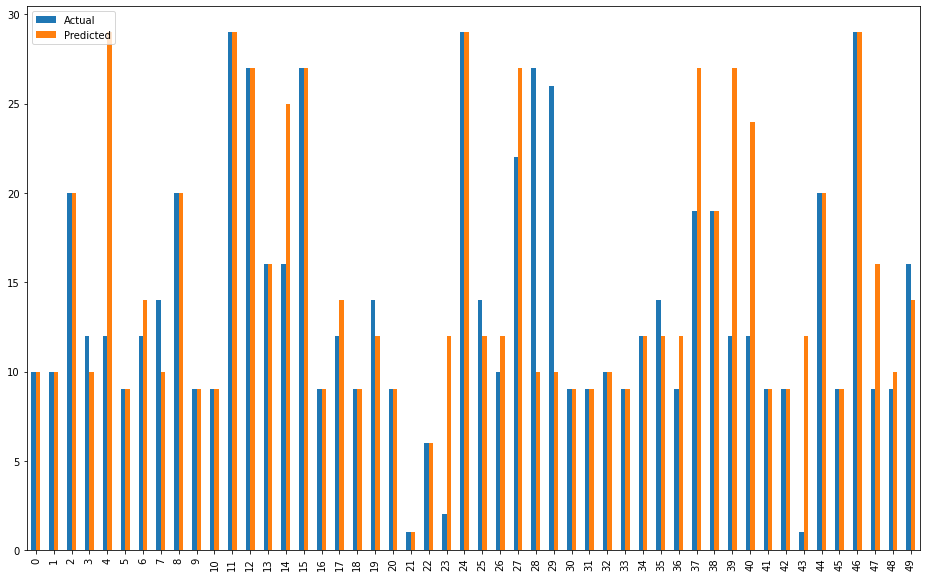

In [146]:
df2 = df1.head(50)
df2.plot(kind='bar',figsize=(16,10))
import matplotlib.pyplot as plt  
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [147]:
import numpy as np  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared Error:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 3.9082217973231357
Mean Squared Error: 44.478011472275334
Root Mean Squared Error: 6.669183718587705
R-squared Error: 0.12356168899372766


In [128]:
print(predictions.size)
print(y_test.size)

523
523


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.86      0.52      0.65        23
           2       0.22      0.22      0.22         9
           3       0.71      0.67      0.69        15
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.43      0.38      0.40        16
           7       0.00      0.00      0.00         1
           8       0.62      0.50      0.56        10
           9       0.72      0.69      0.70        81
          10       0.39      0.48      0.43        60
          11       0.23      0.21      0.22        14
          12       0.28      0.25      0.26        72
          13       0.33      0.33      0.33         3
          14       0.31      0.33      0.32        57
          15       0.00      0.00      0.00         1
          16       0.35      0.26      0.30        23
          17       1.00    

/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaode/opt/anaconda3/

In [163]:
from pygooglenews import GoogleNews
import newspaper

gn = GoogleNews()
newsArticles = gn.search("bank of america")
newsArticles = newsArticles['entries']
articles = []
for entry in newsArticles:
    url = entry['link']
    article = newspaper.Article(url=url, language='en')
    article.download()
    try:
        article.parse();
        if str(article.title)=="Are you a robot?":
            continue
        if str(article.text)=="":
            continue
        article = {
            "title": str(article.title),
            "text": str(article.text),
            "authors": article.authors,
            "published_date": str(article.publish_date),
            "top_image": str(article.top_image),
            "videos": article.movies,
            "keywords": article.keywords,
            "summary": str(article.summary)
        }
        #print("----------"+article["title"] + "------:" + article["text"] + "\n\n")
        articles.append(article);
    except: #if url can not be parsed by parser go to next entry
        continue

In [164]:
len(articles)

84

In [179]:
dfa = pd.DataFrame(articles)
dfa.head()

,title,text,authors,published_date,top_image,videos,keywords,summary
0,Bank of America beats profit estimates on stre...,A Bank of America logo is pictured in the Manh...,[],2022-04-18 00:00:00,https://www.reuters.com/resizer/u_atsakaALVdfI...,[],[],
1,Bank of America is confident in the economy ev...,Bank of America joined its peers in reporting ...,[Lananh Nguyen],2022-04-18 00:00:00,https://static01.nyt.com/images/2022/04/18/bus...,[],[],
2,Bank of America first-quarter profits fall 12%...,Bank of America posted a 12% decline in first-...,[],2022-04-18 12:45:00,https://biztimes.biz/wp-content/uploads/2022/0...,[],[],
3,Bank of America profit tops estimates as lende...,"Brian Moynihan, chairman and chief executive o...",[Hugh Son],2022-04-18 00:00:00,https://image.cnbcfm.com/api/v1/image/10691148...,[],[],
4,Bank of America Stock: More Pain To Come (NYSE...,jetcityimage/iStock Editorial via Getty Images...,[],None,https://static.seekingalpha.com/cdn/s3/uploads...,[],[],


In [183]:
vect = TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text = vect.fit_transform(dfa['text'])

lda_model=LatentDirichletAllocation(n_components=30,
learning_method='online',random_state=100,max_iter=20) 
lda_top=lda_model.fit_transform(vect_text)

len(lda_top)

84

In [184]:
#find top 10 words in each topic
vocab = vect.get_feature_names()
topics=[]
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     c, v =  zip(*sorted_words)
     topics.append(c)
     print(" ")
     print("Topic "+str(i)+": ")
     for t in sorted_words:
#             topics[i].append(t[0])
            print(t[0],end=" ")
     print("\n")

 
Topic 0: 
customer awards broad suite bring checking cash focus way set 

 
Topic 1: 
neutral hoexter pacific trucking transportation report buy get union delivery 

 
Topic 2: 
housing bank units recession business million america small banking color 

 
Topic 3: 
mr moynihan bank profits economic year said street chief sell 

 
Topic 4: 
please murdaugh lawsuit lawyers may ensure suit future report money 

 
Topic 5: 
dow jones stock 12 co thursday 50 corp average data 

 
Topic 6: 
ohio ambrosia musk said food someone branches strive savings board 

 
Topic 7: 
wide positive greater received nine 600 capital seven sector volatility 

 
Topic 8: 
murdaugh suit america dividend common equity bid says information bank 

 
Topic 9: 
chart business atms lawsuit end home affordable lower twitter commentary 

 
Topic 10: 
bank america business digital series small access pm sec edt 

 
Topic 11: 
plus pm also within climb client dining continue 40 ratio 

 
Topic 12: 
friday bank new sai

In [187]:
#find the index of the topic list of each articel.
topic_index=[]
for i,topic in enumerate(lda_top):
#     print("Document i: ")
    print("article ",i,": ",maxi(topic))
    topic_index.append(maxi(topic))


article  0 :  21
article  1 :  21
article  2 :  16
article  3 :  16
article  4 :  21
article  5 :  21
article  6 :  21
article  7 :  21
article  8 :  16
article  9 :  21
article  10 :  16
article  11 :  21
article  12 :  20
article  13 :  21
article  14 :  21
article  15 :  21
article  16 :  21
article  17 :  21
article  18 :  21
article  19 :  5
article  20 :  20
article  21 :  21
article  22 :  20
article  23 :  21
article  24 :  21
article  25 :  21
article  26 :  21
article  27 :  21
article  28 :  21
article  29 :  21
article  30 :  21
article  31 :  21
article  32 :  21
article  33 :  20
article  34 :  21
article  35 :  21
article  36 :  21
article  37 :  20
article  38 :  21
article  39 :  21
article  40 :  4
article  41 :  21
article  42 :  20
article  43 :  20
article  44 :  5
article  45 :  21
article  46 :  21
article  47 :  21
article  48 :  21
article  49 :  21
article  50 :  16
article  51 :  21
article  52 :  21
article  53 :  21
article  54 :  21
article  55 :  21
artic

In [193]:
dfa['topic_index'] = topic_index
X=dfa['text'].values
y=dfa['topic_index'].values.reshape(-1,1)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
print(X.shape, y.shape)
# print(X[0][0])


(84, 5368) (84, 1)


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = MultinomialNB().fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared Error:', metrics.r2_score(y_test, predictions))

Mean Absolute Error: 2.235294117647059
Mean Squared Error: 22.470588235294116
Root Mean Squared Error: 4.7403152042131245
R-squared Error: -0.285940594059406


/Users/gaode/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [198]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
train_accuracy = clf.score(X_train, y_train)
train_accuracy

Test set score: 0.02


0.8059701492537313